This notebook is to handle different SQL queries to better explore and understand the data. The data cleaning and covertion to pandas for different type of data handling is already done. Here importance is for SQL.

In [4]:
import pandas as pd
import pandas_gbq
from google.cloud import bigquery
%load_ext google.cloud.bigquery
# Set your default project here
pandas_gbq.context.project = 'bigquery-public-data'
pandas_gbq.context.dialect = 'standard'

In [5]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]=r"C:\Users\pravd\Downloads\unacast-334100-f70d949ff84e.json"

The below query returns number of bikes in usage per year

In [7]:
%%bigquery
SELECT EXTRACT(YEAR FROM starttime) AS year, 
       COUNT(DISTINCT(bikeid)) AS num_bikes
FROM `bigquery-public-data.new_york_citibike.citibike_trips`
GROUP BY year
ORDER BY year;

Downloading: 100%|█████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38rows/s]


,year,num_bikes
0,NaN,0
1,2013.0,6503
2,2014.0,6811
3,2015.0,8477
4,2016.0,10495
5,2017.0,13820
6,2018.0,12947


The below query returns count of subscribers and customers 

In [12]:
%%bigquery

SELECT EXTRACT(YEAR FROM starttime) AS year,
COUNT(CASE WHEN usertype= 'Subscriber' THEN 1 END) AS count_sub,
COUNT(CASE WHEN usertype= 'Customer' THEN 1 END) AS count_cus,
FROM `bigquery-public-data.new_york_citibike.citibike_trips`
GROUP BY year
ORDER BY year;

Downloading: 100%|█████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.55rows/s]


,year,count_sub,count_cus
0,NaN,0,0
1,2013.0,4370245,666940
2,2014.0,7287721,793495
3,2015.0,8626638,1311331
4,2016.0,9026384,1236265
5,2017.0,12441957,1676712
6,2018.0,5164627,506406


The below query returns count on female and male

In [22]:
%%bigquery
SELECT EXTRACT(YEAR FROM starttime) AS year,
COUNT(CASE WHEN gender= 'female' THEN 1 END) AS count_fem,
COUNT(CASE WHEN gender= 'male' THEN 1 END) AS count_male,
FROM `bigquery-public-data.new_york_citibike.citibike_trips`
GROUP BY year
ORDER BY year;

Downloading: 100%|█████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45rows/s]


,year,count_fem,count_male
0,NaN,0,0
1,2013.0,1034631,3335391
2,2014.0,1650274,5635962
3,2015.0,2006962,6608929
4,2016.0,2186917,6769032
5,2017.0,3236735,9306602
6,2018.0,1260893,3955871


Query Visualize using pandas

In [23]:

client = bigquery.Client()

In [43]:
sql = """ SELECT EXTRACT(YEAR FROM starttime) AS year,
COUNT(CASE WHEN gender= 'female' THEN 1 END) AS count_fem,
COUNT(CASE WHEN gender= 'male' THEN 1 END) AS count_male,
FROM `bigquery-public-data.new_york_citibike.citibike_trips`
GROUP BY year
ORDER BY year; """

df = client.query(sql).to_dataframe()
df.dropna(inplace=True)
df.head()

,year,count_fem,count_male
1,2013.0,1034631,3335391
2,2014.0,1650274,5635962
3,2015.0,2006962,6608929
4,2016.0,2186917,6769032
5,2017.0,3236735,9306602


In [44]:
%matplotlib inline

<AxesSubplot:xlabel='year'>

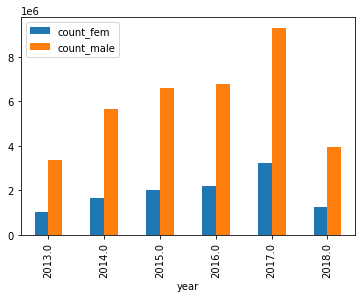

In [45]:
df.plot(x="year", y=["count_fem", "count_male"], kind="bar")

In [49]:
sql_1 = """SELECT
  EXTRACT(year
  FROM
    starttime) AS year,
  SUM(CASE
      WHEN gender='female' THEN tripduration
  END
    )/60*60 AS Male_ride_time,
  SUM(CASE
      WHEN gender='male' THEN tripduration
  END
    )/60*60 AS Female_ride_time
FROM
  `bigquery-public-data.new_york_citibike.citibike_trips`
GROUP BY
  year
HAVING 
  year is NOT NULL
ORDER BY
  year DESC"""

In [50]:
df2 = client.query(sql_1).to_dataframe()
df2.dropna(inplace=True)
df2.head()


,year,Male_ride_time,Female_ride_time
0,2018,1.267776e+09,3.252467e+09
1,2017,3.342083e+09,8.188900e+09
2,2016,2.063674e+09,5.397053e+09
3,2015,1.878910e+09,5.142384e+09
4,2014,1.427969e+09,4.165423e+09


<AxesSubplot:xlabel='year'>

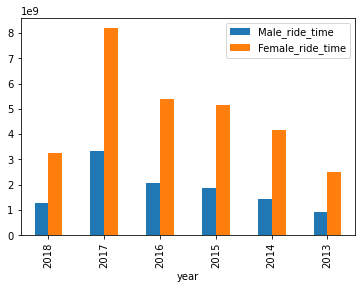

In [52]:
%matplotlib inline
df2.plot(x="year", y=["Male_ride_time", "Female_ride_time"], kind="bar")

The below query returns most popular start and end stations

In [62]:
sql_2 = """SELECT start_station_name, end_station_name, COUNT(*) AS count
FROM `bigquery-public-data.new_york.citibike_trips`
GROUP BY start_station_name, end_station_name
ORDER BY count DESC """


In [63]:
df3 = client.query(sql_2).to_dataframe()
#df3.dropna(inplace=True)
df3.head()


,start_station_name,end_station_name,count
0,Central Park S & 6 Ave,Central Park S & 6 Ave,47215
1,Grand Army Plaza & Central Park S,Grand Army Plaza & Central Park S,18292
2,Broadway & W 60 St,Broadway & W 60 St,16626
3,Centre St & Chambers St,Centre St & Chambers St,13979
4,12 Ave & W 40 St,West St & Chambers St,12417


In [69]:
#trip distribution over the year
sql_3 = """SELECT EXTRACT(YEAR FROM starttime) AS year, 
       COUNT(DISTINCT(tripduration)) AS Tripduration
FROM `bigquery-public-data.new_york_citibike.citibike_trips`
GROUP BY year
ORDER BY year;"""

In [71]:
df4 = client.query(sql_3).to_dataframe()
df4.dropna(inplace=True)
df4.head()

,year,Tripduration
1,2013.0,17502
2,2014.0,19188
3,2015.0,31114
4,2016.0,29759
5,2017.0,29351


In [72]:
%matplotlib inline


<AxesSubplot:xlabel='year'>

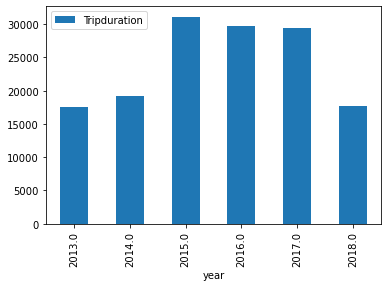

In [73]:
df4.plot(x="year", y=["Tripduration"], kind="bar")

In [18]:
#popular start station name
sql_5 = """SELECT start_station_name, num_station
FROM 
  (SELECT start_station_name, COUNT(start_station_name) AS       
   num_station, EXTRACT(YEAR FROM starttime) AS year
   FROM `bigquery-public-data.new_york_citibike.citibike_trips`
   WHERE usertype = 'Subscriber'
   GROUP BY start_station_name,year
   ORDER BY year)
ORDER BY num_station DESC
LIMIT 10 """

In [19]:
client = bigquery.Client()
df5 = client.query(sql_5).to_dataframe()
#df5.dropna(inplace=True)
df5.head()

,start_station_name,num_station
0,Pershing Square North,127626
1,Pershing Square North,105479
2,Pershing Square North,96750
3,8 Ave & W 31 St,95839
4,8 Ave & W 31 St,93858


<AxesSubplot:ylabel='start_station_name'>

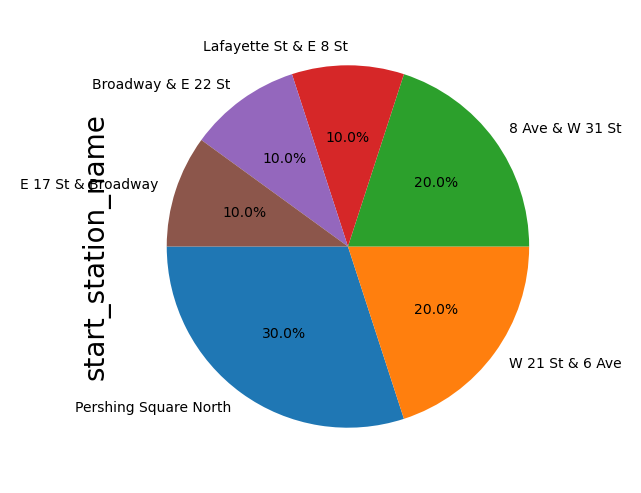

In [58]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(3,3), dpi=200)
ax = plt.subplot(111)
df5['start_station_name'].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=180, fontsize=5)

<AxesSubplot:xlabel='start_station_name'>

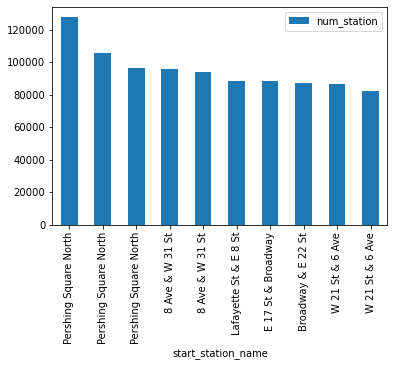

In [20]:
%matplotlib inline
df5.plot(x="start_station_name", y=["num_station"], kind="bar")

In [22]:
#popular end station name
sql_6 = """SELECT end_station_name, num_station
FROM 
  (SELECT end_station_name, COUNT(end_station_name) AS       
   num_station, EXTRACT(YEAR FROM stoptime) AS year
   FROM `bigquery-public-data.new_york_citibike.citibike_trips`
   WHERE usertype = 'Subscriber'
   GROUP BY end_station_name,year
   ORDER BY year)
ORDER BY num_station DESC
LIMIT 10 """

In [23]:
client = bigquery.Client()
df6 = client.query(sql_6).to_dataframe()
#df5.dropna(inplace=True)
df6.head()

,end_station_name,num_station
0,Pershing Square North,126468
1,Pershing Square North,103269
2,Broadway & E 22 St,93243
3,E 17 St & Broadway,91050
4,Lafayette St & E 8 St,89073


<AxesSubplot:ylabel='end_station_name'>

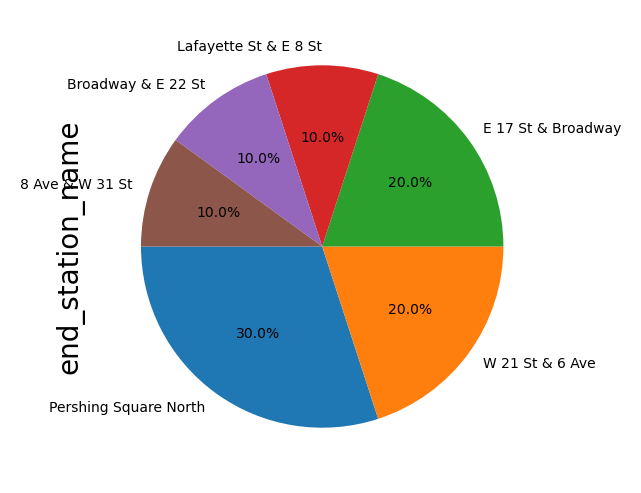

In [59]:
fig = plt.figure(figsize=(3,3), dpi=200)
ax = plt.subplot(111)
df6['end_station_name'].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=180, fontsize=5)

<AxesSubplot:xlabel='end_station_name'>

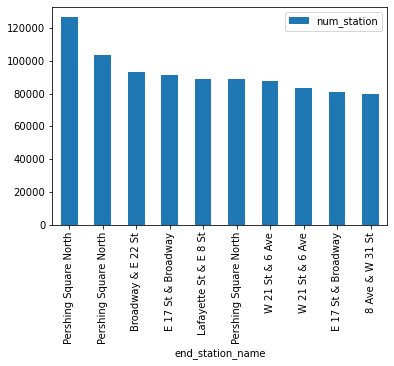

In [25]:
%matplotlib inline
df6.plot(x="end_station_name", y=["num_station"], kind="bar")

In [32]:
#we need to see which bikeid's have mostly used with highest trip duration

sql_7 = """SELECT bikeid, num_trip, duration, ROUND((duration/num_trip), 2) AS avg_duration_trip
FROM
    (SELECT bikeid, SUM(tripduration) AS duration, COUNT(*) AS    
     num_trip
     FROM `bigquery-public-data.new_york_citibike.citibike_trips`
     WHERE bikeid IS NOT NULL
     GROUP BY bikeid
     ORDER BY duration DESC)
LIMIT 10;"""

In [33]:
df7 = client.query(sql_7).to_dataframe()
#df5.dropna(inplace=True)
df7.head()

,bikeid,num_trip,duration,avg_duration_trip
0,30503,1111,20378802,18342.76
1,16533,5699,19913997,3494.30
2,16777,4903,19907111,4060.19
3,18504,5127,18608943,3629.60
4,15336,5373,17557057,3267.65


<AxesSubplot:xlabel='bikeid'>

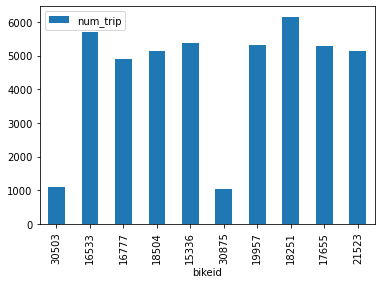

In [29]:
%matplotlib inline
df7.plot(x="bikeid", y=["num_trip"], kind="bar")

In [41]:
#trip distribution based on gender
sql_8 = """SELECT
  EXTRACT(year
  FROM
    starttime) AS year,
  SUM(CASE
      WHEN gender='female' THEN tripduration
  END
    )/60*60 AS Male_ride_time,
  SUM(CASE
      WHEN gender='male' THEN tripduration
  END
    )/60*60 AS Female_ride_time
FROM
  `bigquery-public-data.new_york_citibike.citibike_trips`
GROUP BY
  year
HAVING 
  year is NOT NULL
ORDER BY
  year DESC"""

In [42]:
df8 = client.query(sql_8).to_dataframe()
#df5.dropna(inplace=True)
df8.head()

,year,Male_ride_time,Female_ride_time
0,2018,1.267776e+09,3.252467e+09
1,2017,3.342083e+09,8.188900e+09
2,2016,2.063674e+09,5.397053e+09
3,2015,1.878910e+09,5.142384e+09
4,2014,1.427969e+09,4.165423e+09


<AxesSubplot:xlabel='year'>

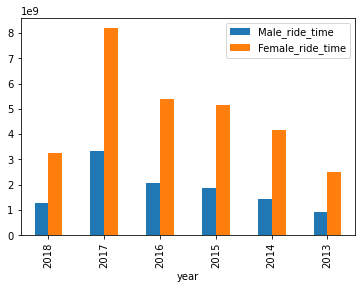

In [43]:
%matplotlib inline
df8.plot(x="year", y=["Male_ride_time", "Female_ride_time"], kind="bar")

In [48]:
#Popular routes analysis
sql_9 = """SELECT
  start_station_id,
  end_station_id,
  COUNT(*) AS Trips_on_route
FROM
  `bigquery-public-data.new_york_citibike.citibike_trips`
WHERE
  (start_station_id != end_station_id) #or (start_station_id = end_station_id and tripduration > 300)
GROUP BY
  start_station_id,
  end_station_id
ORDER BY
  Trips_on_route DESC
LIMIT
  10"""

In [49]:
df9 = client.query(sql_9).to_dataframe()
#df5.dropna(inplace=True)
df9.head()

,start_station_id,end_station_id,Trips_on_route
0,514,426,18667
1,435,509,17509
2,519,492,16228
3,435,462,15120
4,426,514,14353


In [50]:
#Stations with lowest number of trips
sql_10 = """SELECT start_station_name AS station, COUNT(start_station_name) AS num_station
FROM `bigquery-public-data.new_york_citibike.citibike_trips`
GROUP BY station
ORDER BY num_station
LIMIT 10"""

In [51]:
df10 = client.query(sql_10).to_dataframe()
#df5.dropna(inplace=True)
df10.head()

,station,num_station
0,2 Ave & E 105 St,1
1,333 Johnson TEST 1,1
2,LPI Facility,2
3,Expansion Tech Station,2
4,Apache,3
